**Importing Dependencies**


We shall start by importing all the neccessary libraries.

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import re

2023-01-13 19:23:03.527957: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amirzar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
tweet_data = pd.read_csv('Labled_tweets.csv', names=['sentiment', 'id', 'date', 'query', 'user_id', 'text'],encoding="ISO-8859-1") #shuffles the data
tweet_data


,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [5]:
## we only need two columns for sentiment anlysis
tweet_text_sentiment = tweet_data[['text','sentiment']]

## change the categories to their real name 
tweet_text_sentiment["sentiment"].replace(0,"negative",inplace=True)
tweet_text_sentiment["sentiment"].replace(4,"positive",inplace=True)
tweet_text_sentiment["sentiment"]


/var/folders/gy/scg9c9b176sck8t_0rgv5qj80000gn/T/ipykernel_5660/1907882324.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_text_sentiment["sentiment"].replace(0,"negative",inplace=True)
/var/folders/gy/scg9c9b176sck8t_0rgv5qj80000gn/T/ipykernel_5660/1907882324.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_text_sentiment["sentiment"].replace(4,"positive",inplace=True)


0          negative
1          negative
2          negative
3          negative
4          negative
             ...   
1599995    positive
1599996    positive
1599997    positive
1599998    positive
1599999    positive
Name: sentiment, Length: 1600000, dtype: object

<AxesSubplot: xlabel='sentiment', ylabel='count'>

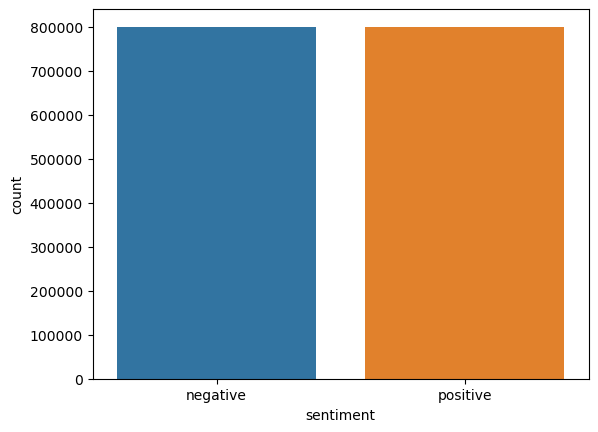

In [6]:
sns.countplot(x="sentiment",data = tweet_text_sentiment)

In [7]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(
        "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+", ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)


In [8]:
tweet_text_sentiment.text = tweet_data.text.apply(lambda x: preprocess(x))

/var/folders/gy/scg9c9b176sck8t_0rgv5qj80000gn/T/ipykernel_5660/109412406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_text_sentiment.text = tweet_data.text.apply(lambda x: preprocess(x))


In [9]:
tweet_text_sentiment["text"]

0               awww bummer shoulda got david carr third day
1          upset update facebook texting might cry result...
2          dived many times ball managed save 50 rest go ...
3                           whole body feels itchy like fire
4                                           behaving mad see
                                 ...                        
1599995                        woke school best feeling ever
1599996             thewdb com cool hear old walt interviews
1599997                      ready mojo makeover ask details
1599998    happy 38th birthday boo alll time tupac amaru ...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1600000, dtype: object

In [10]:
sample_negative = tweet_text_sentiment[tweet_text_sentiment["sentiment"] == "negative" ][0:40000]
sample_positive = tweet_text_sentiment[tweet_text_sentiment["sentiment"] == "positive"][0:40000]


In [11]:
sample_tweet = pd.concat([sample_negative, sample_positive], axis=0)
sample_tweet["sentiment"].value_counts()



negative    40000
positive    40000
Name: sentiment, dtype: int64

In [12]:
## Now we can shuffle our data 
sample_tweet.sample(frac=1)

,text,sentiment
826372,wow awesome best battles place end tourney big...,positive
11787,surprised,negative
31425,summer yet approaching north spain,negative
6870,signing contracts marrying things 399 days go,negative
800219,roflmao niqqa please ackin fool,positive
...,...,...
16088,hay im cc also aka walsh talk work must hard job,negative
8204,see listing tried twice,negative
30895,sorry im far away moment sorry lauren going,negative
18072,sometimes wanna home,negative


In [13]:
## for starting the learning process we should vectorize the text of tweets with TFIDF we will do that.
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(sample_tweet['text'])

TfidfVectorizer()

In [14]:
X = vectorizer.transform(sample_tweet['text'])

In [15]:
## The algorithm only understand digit so we should encode our target which is "Negative" and "Positive"
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(sample_tweet['sentiment'])


In [16]:
le.classes_

array(['negative', 'positive'], dtype=object)

In [18]:
## Lets check the size of input and output!
import numpy as np
print(np.shape(X))
print(np.shape(y))


(80000, 47548)
(80000,)


In [19]:
## Now we should split our data into train and test:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)


In [20]:
from sklearn import svm
model = svm.SVC(C=1, kernel='linear', random_state=2023 ,probability=True)
model.fit(X_train, y_train)

SVC(C=1, kernel='linear', probability=True, random_state=2023)

In [21]:
model.score(X_test, y_test)


0.7547

In [22]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)


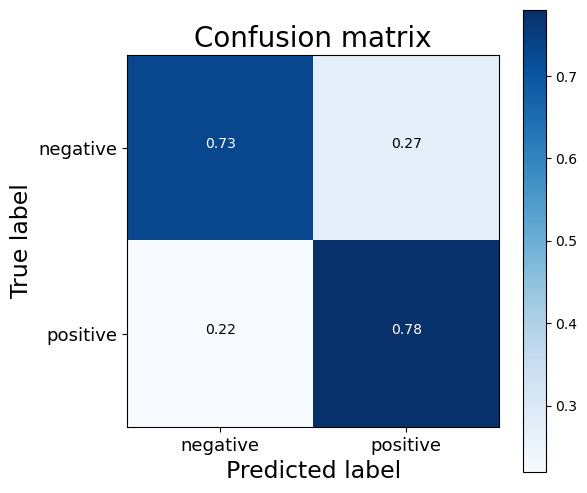

In [38]:
y_pred = model.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
plot_confusion_matrix(
    cnf_matrix, classes=tweet_text_sentiment.sentiment.unique(), title="Confusion matrix")
plt.show()


In [25]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.73      0.75     10033
           1       0.74      0.78      0.76      9967

    accuracy                           0.75     20000
   macro avg       0.76      0.75      0.75     20000
weighted avg       0.76      0.75      0.75     20000



In [26]:
probability_results = model.predict_proba(X_test)
prob_df = pd.DataFrame(probability_results)
prediction_df = pd.DataFrame(y_pred)

In [27]:
result_test = pd.concat([prob_df ,prediction_df],axis=1)
result_test.columns = ["negative_prob","postitve_prob","predicted"]
result_test["predicted"].replace(0,"negative",inplace=True)
result_test["predicted"].replace(1,"possitive",inplace=True)
result_test

,negative_prob,postitve_prob,predicted
0,0.523476,0.476524,negative
1,0.068109,0.931891,possitive
2,0.329310,0.670690,possitive
3,0.164972,0.835028,possitive
4,0.190458,0.809542,possitive
...,...,...,...
19995,0.511941,0.488059,negative
19996,0.698336,0.301664,negative
19997,0.238662,0.761338,possitive
19998,0.871464,0.128536,negative


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

params = {
    'C': [1,5,10],
    'kernel': ['linear','rbf'],
    'gamma': ['auto', 0.1]
}
gsh = GridSearchCV(SVC(), param_grid=params, scoring='accuracy', cv=2, n_jobs=-1, verbose=10)

gsh.fit(X, y)

In [118]:
gsh.best_estimator_

SVC(C=10, gamma='auto', kernel='linear')

In [29]:
import pickle 

with open("svc_80000_sample.sentiment","wb") as f:
    pickle.dump(model,f)


In [31]:
model_svm = pickle.load(open("svc_80000_sample.sentiment","rb"))